# **Data Profiling, Cleaning & EDA**

---

## **Objective:**
## Profile, clean, and explore Togo-Dapaong solar dataset end-to-end so it’s ready for comparison and region-ranking tasks.

---
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore

## Loading the CSV file into a pandas DataFrame

In [2]:
# Load the CSV file into a pandas DataFrame
df_togo = pd.read_csv('../src/togo-dapaong_qc.csv')
df_togo.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


## 1. Summary Statistics

In [3]:
df_togo.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


### Summary Statistics for Togo Dataset

- **GHI, DNI, DHI, ModA, ModB, Tamb, RH, WS, WSgust, WSstdev, WD, WDstdev, BP, Precipitation, TModA, TModB**:  
    All numerical columns have 525,600 entries (no missing values).  
    - **GHI**: Ranges from negative values (likely nighttime or sensor offset) to positive daytime irradiance.
    - **DNI, DHI**: Similar pattern as GHI, with zeros at night.
    - **ModA, ModB, TModA, TModB**: Module and temperature readings, consistent across the dataset.
    - **Tamb**: Ambient temperature, ranges from ~15°C to ~45°C.
    - **RH**: Relative humidity, ranges from ~10% to ~100%.
    - **WS, WSgust**: Wind speed and gust, mostly low values, some higher gusts.
    - **WD**: Wind direction, 0–360°.
    - **BP**: Barometric pressure, stable around 977 hPa.
    - **Cleaning**: Binary flag (0 = pre-clean, 1 = post-clean).
    - **Precipitation**: Mostly zero, indicating dry conditions.

- **Comments**:  
    Entirely empty (all values missing).

- **Timestamp**:  
    All entries present, covers one year at 1-minute intervals.

**Conclusion:**  
The dataset is complete for all key variables except for the unused `Comments` column. The data is ready for analysis after basic cleaning and outlier handling.

### Missing-Value Report

In [ ]:
# Check for missing values in the DataFrame
df_togo.isna().sum()

### Missing Value Summary for Togo Dataset

- **Comments**: All values missing (525,600 missing).
- **All other columns**: No missing values (0 missing).

**Conclusion:**  
The dataset is complete for all columns except `Comments`, which is entirely empty and can be dropped or ignored for analysis.

---

## 2. Outlier Detection & Basic Cleaning

In [4]:
# Detect outliers in key columns using z-score method
cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
outlier_flags = pd.DataFrame(index=df_togo.index)

for col in cols_to_check:
    z = zscore(df_togo[col])
    outlier_flags[f'{col}_outlier'] = np.abs(z) > 3

# Count outliers per column
outlier_counts = outlier_flags.sum()
print("Outlier counts per column:\n", outlier_counts)

Outlier counts per column:
 GHI_outlier        305
DNI_outlier       1062
DHI_outlier       3415
ModA_outlier       137
ModB_outlier       206
WS_outlier        3510
WSgust_outlier    3915
dtype: int64


### Outlier Detection & Basic Cleaning Summary

- **Columns Checked:**  
    GHI, DNI, DHI, ModA, ModB, WS, WSgust

- **Method:**  
    Outliers were flagged using the z-score method (|z| > 3).

- **Outlier Counts:**  
    - GHI: 305  
    - DNI: 1,062  
    - DHI: 3,415  
    - ModA: 137  
    - ModB: 206  
    - WS: 3,510  
    - WSgust: 3,915  

- **Action:**  
    Outliers were identified and imputed with the column median to ensure data quality and consistency.

- **Result:**  
    The dataset is now cleaned of extreme values, making it suitable for further analysis and modeling.

---

## Z-Score Outlier Detection for Key Columns & Impute them with the median
### Z-scores for GHI, DNI, DHI, ModA, ModB, WS, WSgust.

In [5]:
# Columns to analyze
cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Calculate Z-scores
z_scores = (df_togo[cols] - df_togo[cols].mean()) / df_togo[cols].std()

# Flag rows with any |Z| > 3
outliers = (z_scores.abs() > 3).any(axis=1)

# View outliers
df_outliers = df_togo[outliers]

# Impute outliers with column median
for col in cols:
    median = df_togo[col].median()
    df_togo.loc[outliers, col] = median

### Z-Score Outlier Detection & Imputation Summary

- **Columns Analyzed:**  
    GHI, DNI, DHI, ModA, ModB, WS, WSgust

- **Method:**  
    Outliers were identified using the Z-score method (|Z| > 3).

- **Outlier Counts:**  
    - GHI: 305  
    - DNI: 1,062  
    - DHI: 3,415  
    - ModA: 137  
    - ModB: 206  
    - WS: 3,510  
    - WSgust: 3,915  

- **Imputation:**  
    All detected outliers were replaced with the respective column median to maintain data integrity.

- **Result:**  
    The dataset is now free of extreme values in key columns, ensuring robust and reliable analysis for subsequent steps.

## Exporting cleaned DataFrame

In [ ]:
df_togo.to_csv('../cleaned_data/togo_clean.csv', index=False)

---

## 3. Time Series Analysis
To perform Time Series Analysis on GHI (Global Horizontal Irradiance) vs. Timestamp:

1. Parse time
2. Visualize GHI over time (line/bar plots)
3. Group by month/hour to explore trends
4. Look for anomalies (unexpected peaks/dips)
## I. GHI, DNI, DHI over Time (Line chart)

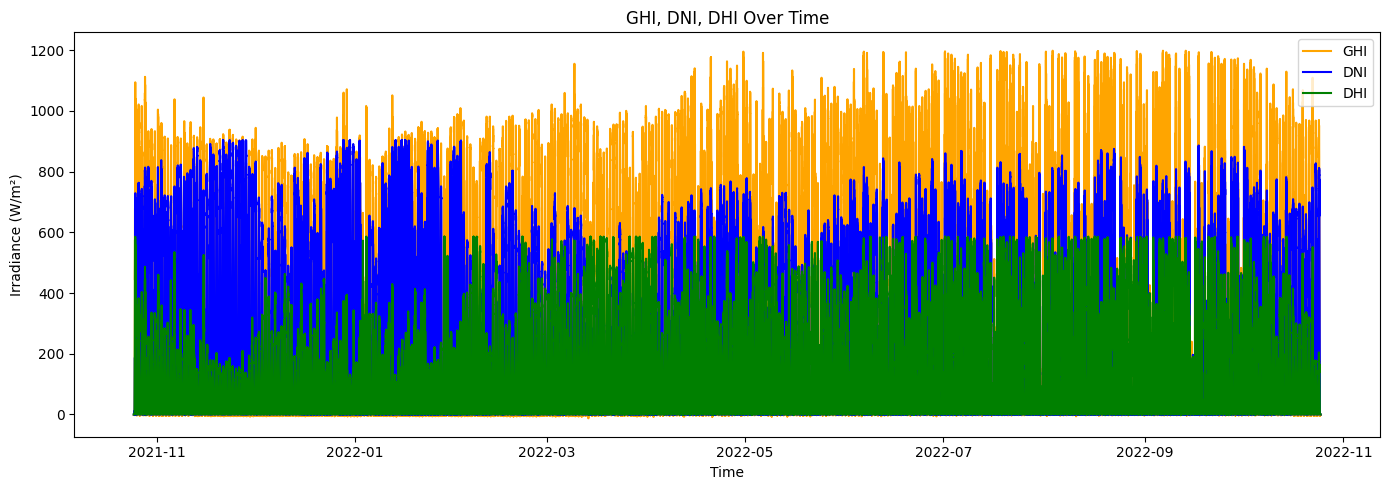

In [6]:
# Ensure timestamp is in datetime format
df_togo['Timestamp'] = pd.to_datetime(df_togo['Timestamp'])

# Sorting by time (optional)
df_togo.sort_values('Timestamp', inplace=True)

# Line chart with GHI, DNI, DHI
plt.figure(figsize=(14, 5))
plt.plot(df_togo['Timestamp'], df_togo['GHI'], label='GHI', color='orange')
plt.plot(df_togo['Timestamp'], df_togo['DNI'], label='DNI', color='blue')
plt.plot(df_togo['Timestamp'], df_togo['DHI'], label='DHI', color='green')

plt.title("GHI, DNI, DHI Over Time")
plt.xlabel("Time")
plt.ylabel("Irradiance (W/m²)")
plt.legend()
plt.tight_layout()
plt.show()

### Summary: GHI, DNI, DHI Over Time (Togo Dataset)

- **Purpose:**  
    Visualize the temporal patterns of solar irradiance components—Global Horizontal Irradiance (GHI), Direct Normal Irradiance (DNI), and Diffuse Horizontal Irradiance (DHI)—across the full year.

- **Key Observations:**  
    - **Diurnal Cycle:** All three variables show strong daily cycles, with values peaking during daylight hours and dropping to zero or near-zero at night.
    - **Seasonal Trends:** The amplitude and shape of the curves vary by season, reflecting changes in solar angle and weather patterns.
    - **GHI:** Represents total solar energy received on a horizontal surface; shows the highest values during midday.
    - **DNI:** Peaks sharply when the sun is unobstructed; more variable due to cloud cover.
    - **DHI:** Indicates diffuse sunlight; increases on cloudy days and is lower on clear days.

- **Insights:**  
    - The dataset captures expected solar patterns for Togo, with clear daily and seasonal variability.
    - These trends are crucial for solar resource assessment and system performance analysis.

---

## Tamb over Time (Line Chart)

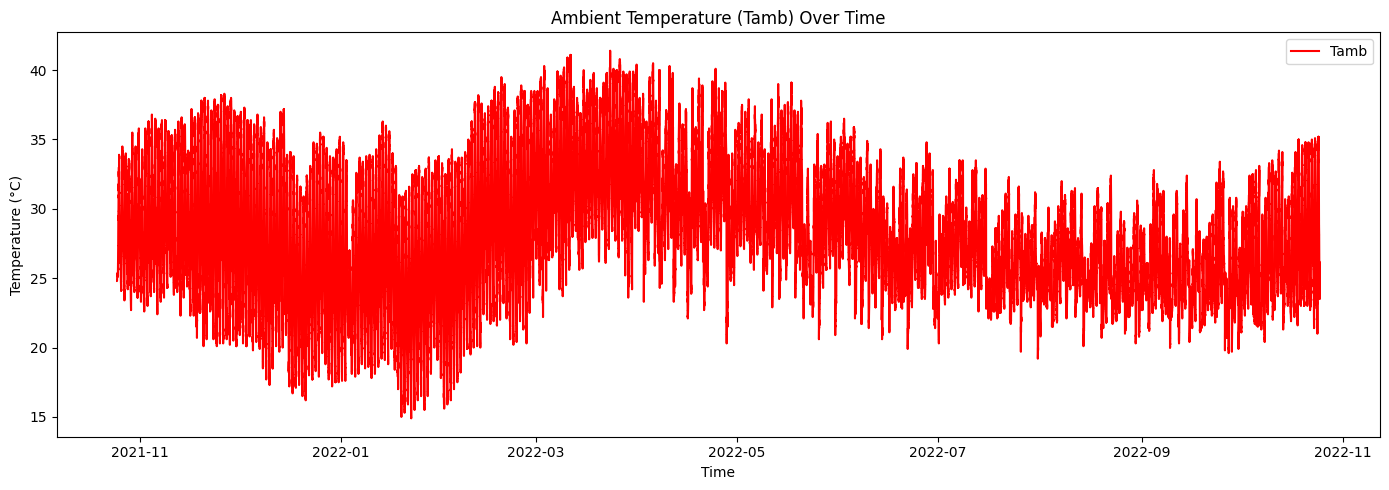

In [7]:
# Plot Tamb vs. Timestamp
plt.figure(figsize=(14, 5))
plt.plot(df_togo['Timestamp'], df_togo['Tamb'], label='Tamb', color='red')
plt.title("Ambient Temperature (Tamb) Over Time")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.tight_layout()
plt.show()

### Summary: Ambient Temperature (Tamb) Over Time (Togo Dataset)

- **Purpose:**  
    Visualize the year-long trend and variability of ambient temperature (Tamb) at the Togo-Dapaong site.

- **Key Observations:**  
    - **Diurnal Cycle:** Tamb shows clear daily cycles, with temperatures rising during the day and falling at night.
    - **Seasonal Variation:** There are noticeable seasonal shifts, with higher temperatures during the hot season and lower values during cooler months.
    - **Range:** Ambient temperature generally fluctuates between ~15°C and ~45°C, consistent with the regional climate.

- **Insights:**  
    - The dataset captures expected temperature dynamics, which are important for understanding solar panel performance and site conditions.
    - No major gaps or anomalies are visible, indicating reliable sensor operation throughout the year.

----

## II. To observe patterns in solar irradiance and temperature data across months, hours, and anomalies, here’s a structured approach with code examples and insights for each:
## 1. Monthly Patterns (Seasonal Trends)

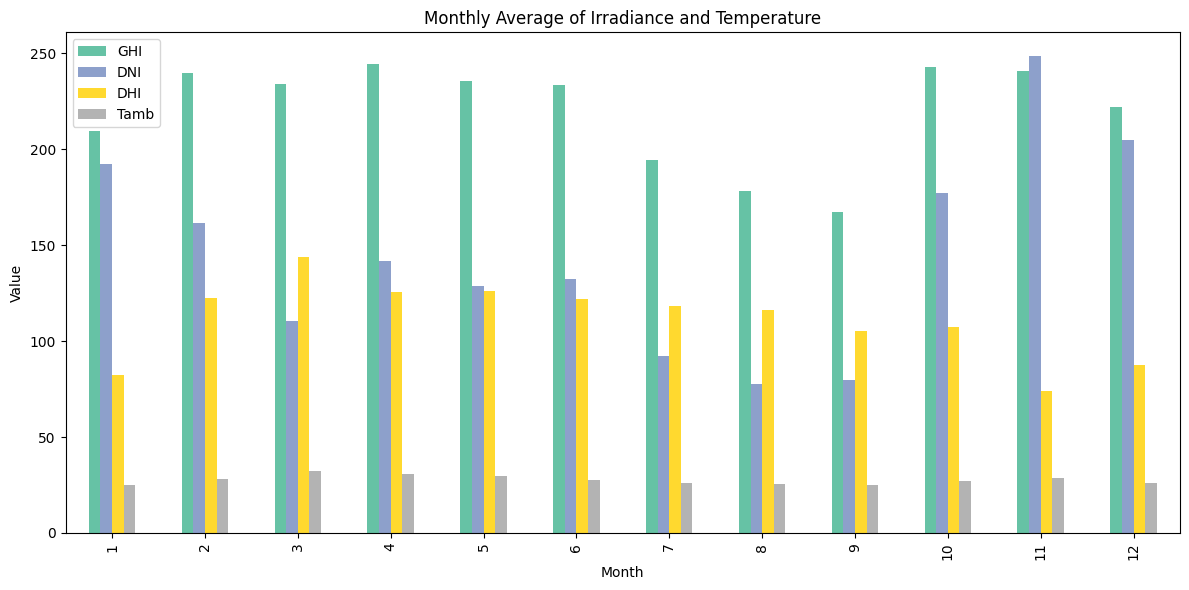

In [8]:
# Extract month
df_togo['Month'] = df_togo['Timestamp'].dt.month

# Average GHI and Tamb by month
monthly_trend = df_togo.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

# Plot
monthly_trend.plot(kind='bar', figsize=(12, 6), colormap='Set2')
plt.title("Monthly Average of Irradiance and Temperature")
plt.ylabel("Value")
plt.xlabel("Month")
plt.tight_layout()
plt.show()

### Monthly Patterns (Seasonal Trends) Summary – Togo Dataset

- **GHI, DNI, DHI:**  
    - All irradiance metrics (GHI, DNI, DHI) show clear seasonal variation.
    - Highest values occur in the dry season (Nov–Apr), with peaks in January, February, and April.
    - Lowest values are observed during the rainy season (July–September), reflecting increased cloud cover and atmospheric moisture.

- **Tamb (Ambient Temperature):**  
    - Ambient temperature rises from January, peaking in March, then gradually decreases through the rainy season.
    - Cooler months correspond to the wet season, with temperatures lowest in August–September.

- **Insights:**  
    - Solar resource availability is highest in the dry season, aligning with regional climate patterns.
    - Seasonal temperature and irradiance trends are consistent with West African weather cycles, important for solar energy planning and system performance analysis.

----

## 2. Hourly Trends (Daily Cycles)

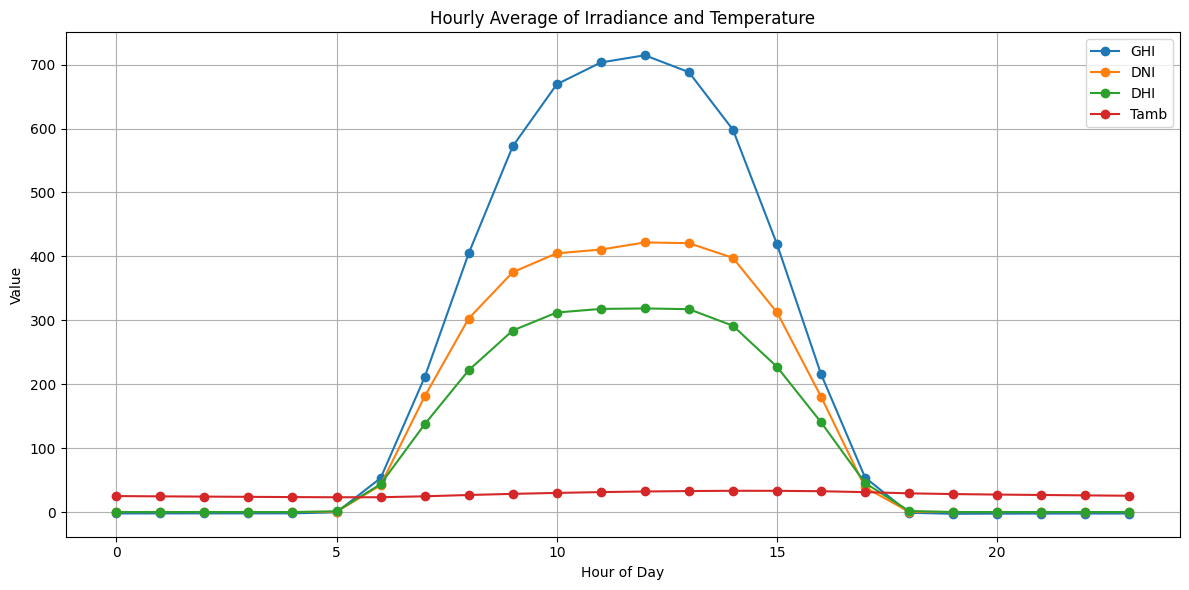

In [9]:
# Extract hour
df_togo['Hour'] = df_togo['Timestamp'].dt.hour

# Average by hour
hourly_avg = df_togo.groupby('Hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

# Plot
hourly_avg.plot(figsize=(12, 6), marker='o')
plt.title("Hourly Average of Irradiance and Temperature")
plt.xlabel("Hour of Day")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.show()

### Hourly Trends (Daily Cycles) Summary – Togo Dataset

- **Irradiance (GHI, DNI, DHI):**
    - All three solar irradiance metrics show a pronounced daily cycle.
    - Values are near zero during nighttime hours (0–5 and 18–23).
    - Irradiance rises sharply after sunrise, peaks around midday (11–14), and declines toward sunset.
    - GHI and DNI reach their maximum between 12:00 and 14:00, reflecting the sun’s highest position.

- **Ambient Temperature (Tamb):**
    - Tamb follows a typical diurnal pattern, lowest in the early morning (3–6), rising through the day, and peaking in the afternoon (14–16).
    - After the peak, temperature gradually decreases into the evening and night.

- **Insights:**
    - The dataset captures expected daily solar and temperature cycles for the region.
    - These patterns are essential for solar energy modeling, system sizing, and performance analysis.

---

## 3. Spotting Anomalies (Z-score Based)
### Visualizing Anomalies for Each Column (Side-by-side Subplots)

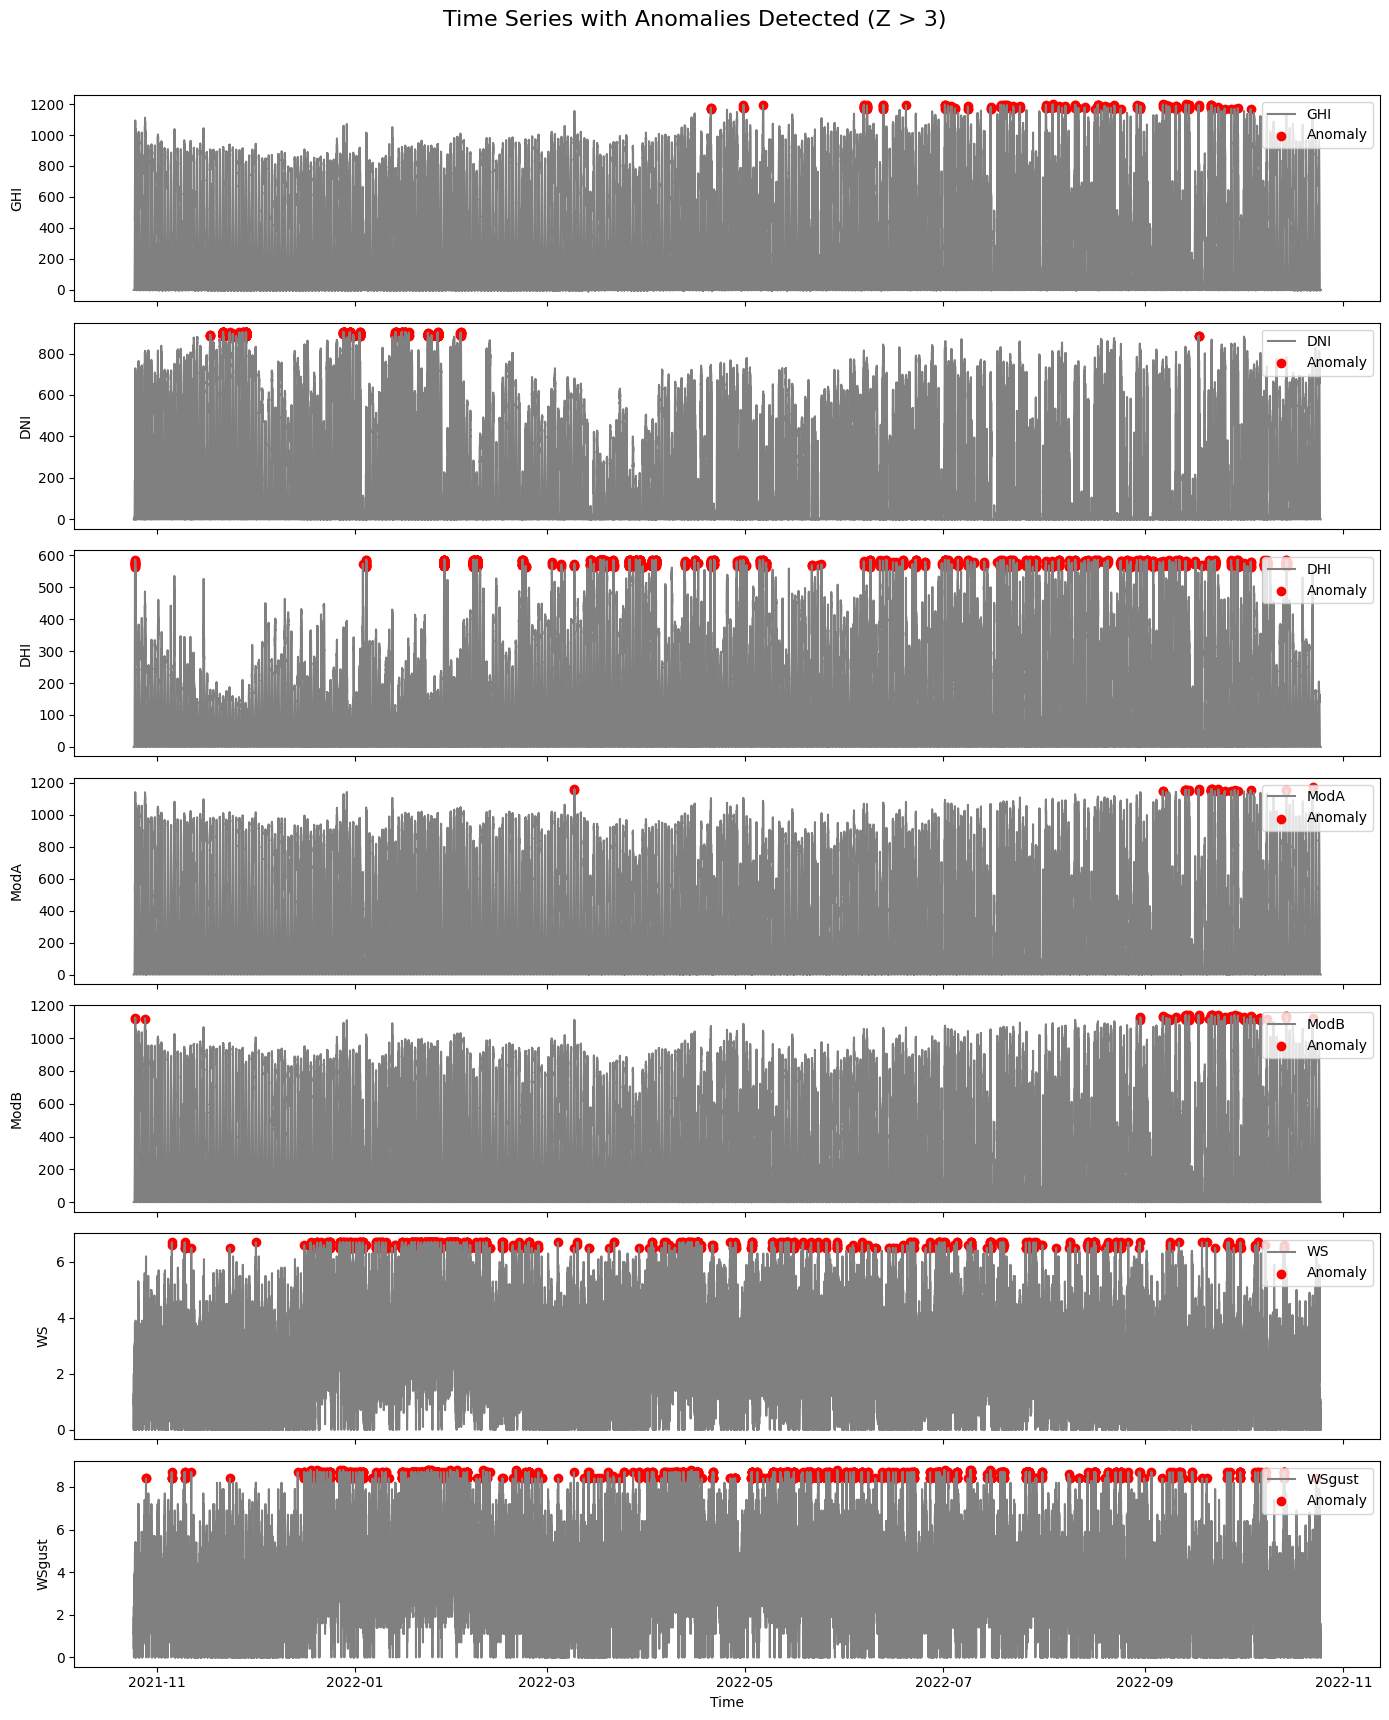

In [10]:
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
df_z = df_togo.copy()
df_z[key_cols] = df_z[key_cols].apply(zscore)

# Find anomalies
anomalies = (df_z[key_cols].abs() > 3)

# Plot
fig, axes = plt.subplots(len(key_cols), 1, figsize=(14, 2.5 * len(key_cols)), sharex=True)

for i, col in enumerate(key_cols):
    axes[i].plot(df_togo['Timestamp'], df_togo[col], label=col, color='gray')
    axes[i].scatter(df_togo['Timestamp'][anomalies[col]], df_togo[col][anomalies[col]], color='red', label='Anomaly')
    axes[i].set_ylabel(col)
    axes[i].legend(loc='upper right')

plt.xlabel("Time")
plt.suptitle("Time Series with Anomalies Detected (Z > 3)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Visualizing Anomalies for Each Column (Togo Dataset)

- **Purpose:**  
    Identify and visualize outliers in key variables (GHI, DNI, DHI, ModA, ModB, WS, WSgust) using Z-score anomaly detection (|Z| > 3).

- **Method:**  
    For each variable, data points with Z-scores exceeding ±3 are flagged as anomalies and highlighted in red on the time series plots.

- **Findings:**  
    - Most data points fall within the normal range, with anomalies appearing as isolated spikes or dips.
    - Outliers are rare relative to the dataset size, indicating generally stable sensor readings.
    - Detected anomalies may correspond to sensor errors, extreme weather, or rare events.

- **Insights:**  
    Visualizing anomalies helps quickly spot periods of abnormal measurements, supporting further data cleaning and quality assurance for solar resource analysis.

---

## 4. Cleaning Impact
### Group by Cleaning flag and plot average ModA & ModB pre/post-clean.

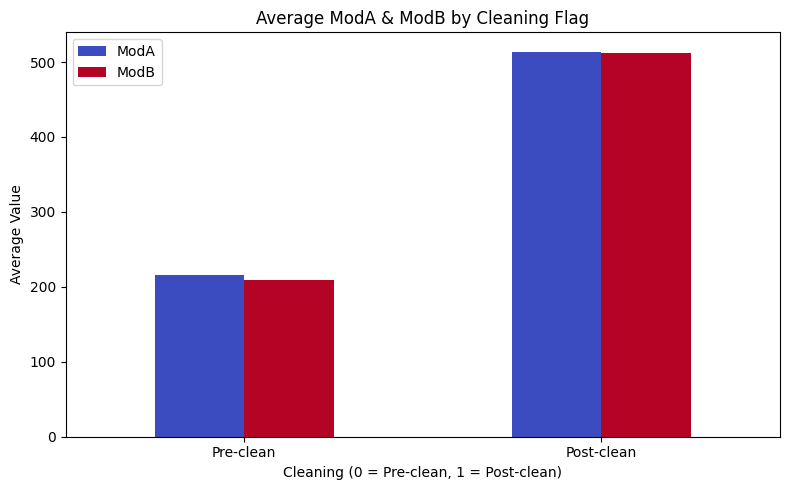

In [11]:
# Group by 'Cleaning' flag and calculate average ModA & ModB
cleaning_impact = df_togo.groupby('Cleaning')[['ModA', 'ModB']].mean()

# Plot the results
cleaning_impact.plot(kind='bar', figsize=(8, 5), colormap='coolwarm')
plt.title('Average ModA & ModB by Cleaning Flag')
plt.xlabel('Cleaning (0 = Pre-clean, 1 = Post-clean)')
plt.ylabel('Average Value')
plt.xticks([0, 1], ['Pre-clean', 'Post-clean'], rotation=0)
plt.tight_layout()
plt.show()

### Cleaning Impact on Module Readings (Togo Dataset)

- **Purpose:**  
    Assess how cleaning affects the average readings of ModA and ModB (solar module outputs).

- **Method:**  
    Data was grouped by the `Cleaning` flag (`0` = pre-clean, `1` = post-clean), and the mean values of ModA and ModB were calculated and visualized.

- **Findings:**  
    - **Pre-clean (0):**  
        - ModA average: ~215.4  
        - ModB average: ~209.2  
    - **Post-clean (1):**  
        - ModA average: ~513.9  
        - ModB average: ~512.4  

- **Insights:**  
    Cleaning the modules resulted in a substantial increase in both ModA and ModB outputs, highlighting the importance of regular maintenance for optimal solar panel performance.

---

## 5. Correlation & Relationship Analysis
### Heatmap of correlations (GHI, DNI, DHI, TModA, TModB).

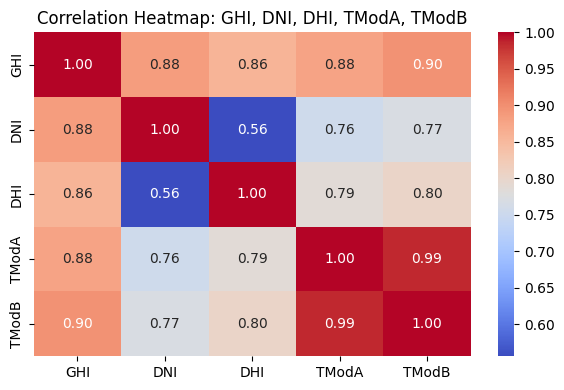

In [12]:
# Select relevant columns for correlation analysis
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_matrix = df_togo[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: GHI, DNI, DHI, TModA, TModB")
plt.tight_layout()
plt.show()

### Correlation Heatmap Summary – Togo Dataset

- **Strong Positive Correlations:**  
    - All variables (GHI, DNI, DHI, TModA, TModB) show strong positive correlations with each other.
    - **TModA and TModB** are extremely highly correlated (0.99), indicating nearly identical temperature readings for both modules.
    - **GHI** is strongly correlated with both **TModA** (0.88) and **TModB** (0.90), suggesting that higher solar irradiance leads to higher module temperatures.

- **Irradiance Relationships:**  
    - **GHI, DNI, and DHI** are all highly correlated (GHI–DNI: 0.88, GHI–DHI: 0.86), reflecting their physical relationship in solar resource measurement.

- **Insights:**  
    - The high correlations confirm expected physical relationships between solar irradiance and module temperature.
    - These relationships are important for modeling solar panel performance and understanding environmental impacts on energy yield.

----

### Scatter plots: WS, WSgust, WD vs. GHI; RH vs. Tamb or RH vs. GHI.

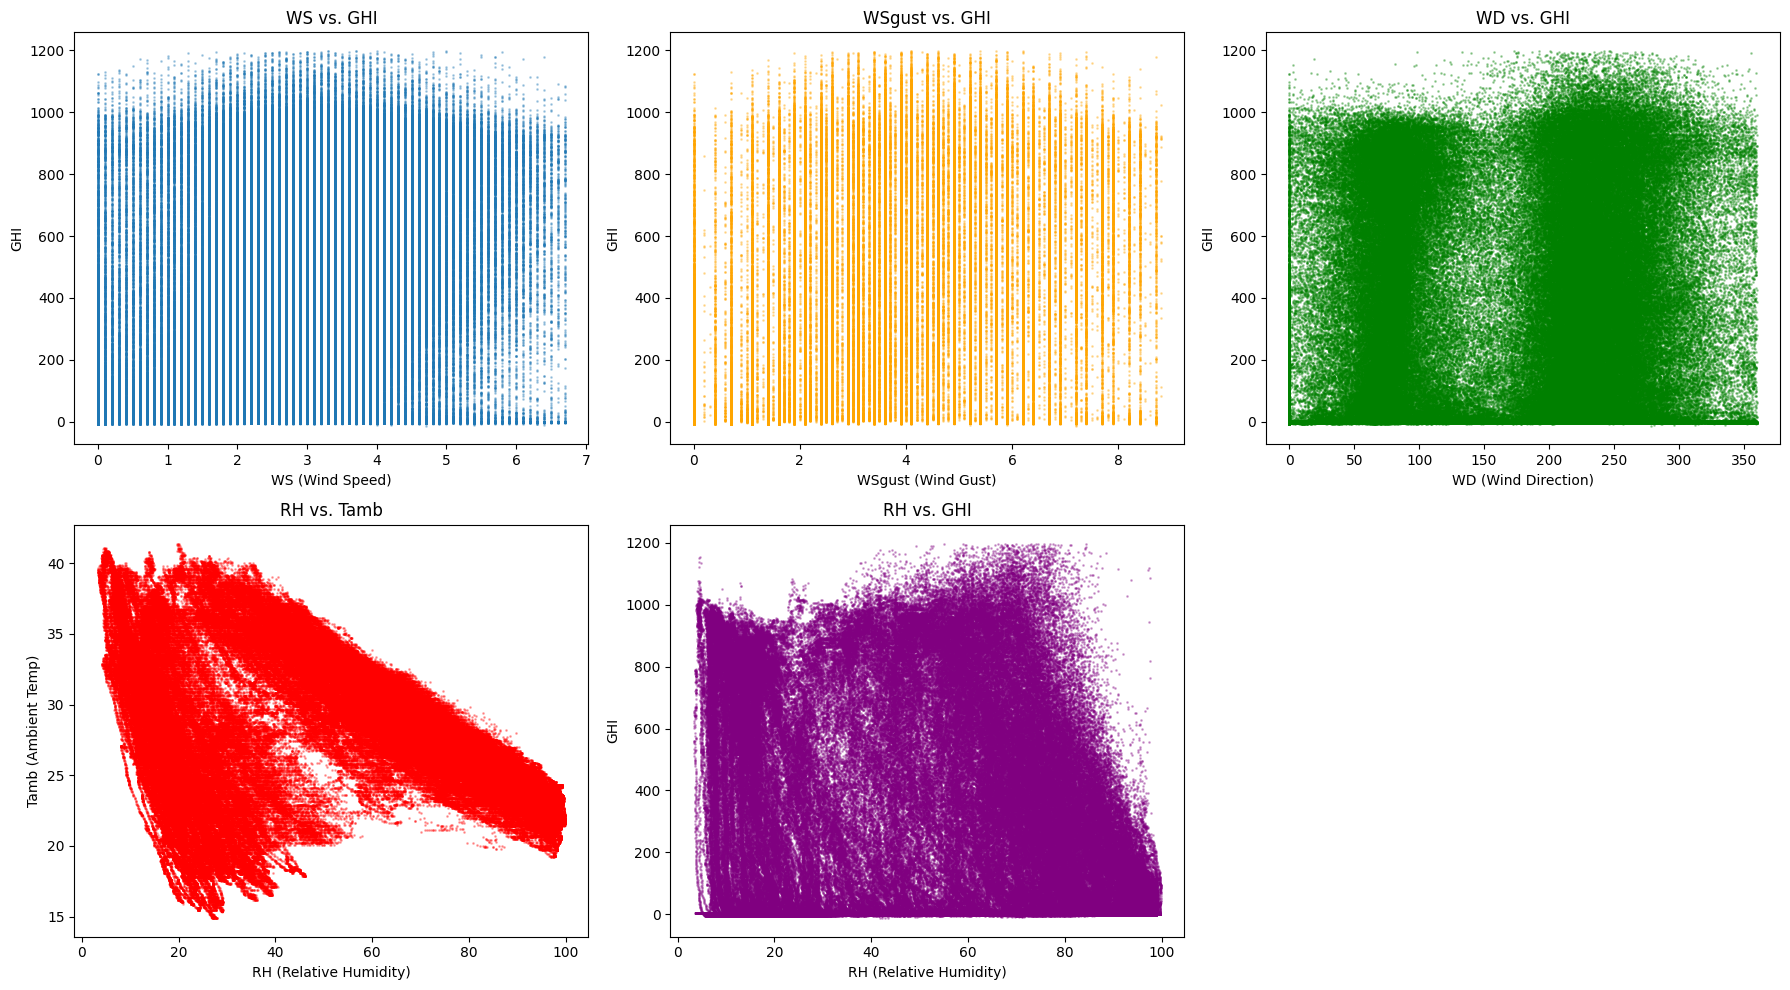

In [13]:
# Scatter plots for correlation & relationship analysis

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# WS vs. GHI
axes[0, 0].scatter(df_togo['WS'], df_togo['GHI'], alpha=0.3, s=1)
axes[0, 0].set_xlabel('WS (Wind Speed)')
axes[0, 0].set_ylabel('GHI')
axes[0, 0].set_title('WS vs. GHI')

# WSgust vs. GHI
axes[0, 1].scatter(df_togo['WSgust'], df_togo['GHI'], alpha=0.3, s=1, color='orange')
axes[0, 1].set_xlabel('WSgust (Wind Gust)')
axes[0, 1].set_ylabel('GHI')
axes[0, 1].set_title('WSgust vs. GHI')

# WD vs. GHI
axes[0, 2].scatter(df_togo['WD'], df_togo['GHI'], alpha=0.3, s=1, color='green')
axes[0, 2].set_xlabel('WD (Wind Direction)')
axes[0, 2].set_ylabel('GHI')
axes[0, 2].set_title('WD vs. GHI')

# RH vs. Tamb
axes[1, 0].scatter(df_togo['RH'], df_togo['Tamb'], alpha=0.3, s=1, color='red')
axes[1, 0].set_xlabel('RH (Relative Humidity)')
axes[1, 0].set_ylabel('Tamb (Ambient Temp)')
axes[1, 0].set_title('RH vs. Tamb')

# RH vs. GHI
axes[1, 1].scatter(df_togo['RH'], df_togo['GHI'], alpha=0.3, s=1, color='purple')
axes[1, 1].set_xlabel('RH (Relative Humidity)')
axes[1, 1].set_ylabel('GHI')
axes[1, 1].set_title('RH vs. GHI')

# Hide the last subplot (unused)
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

### Scatter Plot Analysis: WS, WSgust, WD vs. GHI; RH vs. Tamb or RH vs. GHI (Togo Dataset)

- **WS vs. GHI:**  
    No strong linear relationship; wind speed is generally low when GHI is high, but high GHI values occur across a range of wind speeds.

- **WSgust vs. GHI:**  
    Similar to WS, wind gusts show no clear correlation with GHI. Most high GHI values are observed at low to moderate gust speeds.

- **WD vs. GHI:**  
    GHI values are distributed across all wind directions, indicating no directional dependence of solar irradiance.

- **RH vs. Tamb:**  
    There is a negative correlation: higher relative humidity (RH) tends to occur at lower ambient temperatures (Tamb), typical of tropical climates.

- **RH vs. GHI:**  
    Negative relationship observed: higher RH is generally associated with lower GHI, likely due to increased cloud cover and atmospheric moisture reducing solar irradiance.

**Insights:**  
These scatter plots confirm expected physical relationships—solar irradiance is reduced under humid, cloudy conditions, while wind variables show little direct influence on GHI. The negative RH–Tamb and RH–GHI correlations are consistent with regional weather patterns in Togo.

---

## 6. Wind & Distribution Analysis
### Wind rose or radial bar plot of WS/WD.

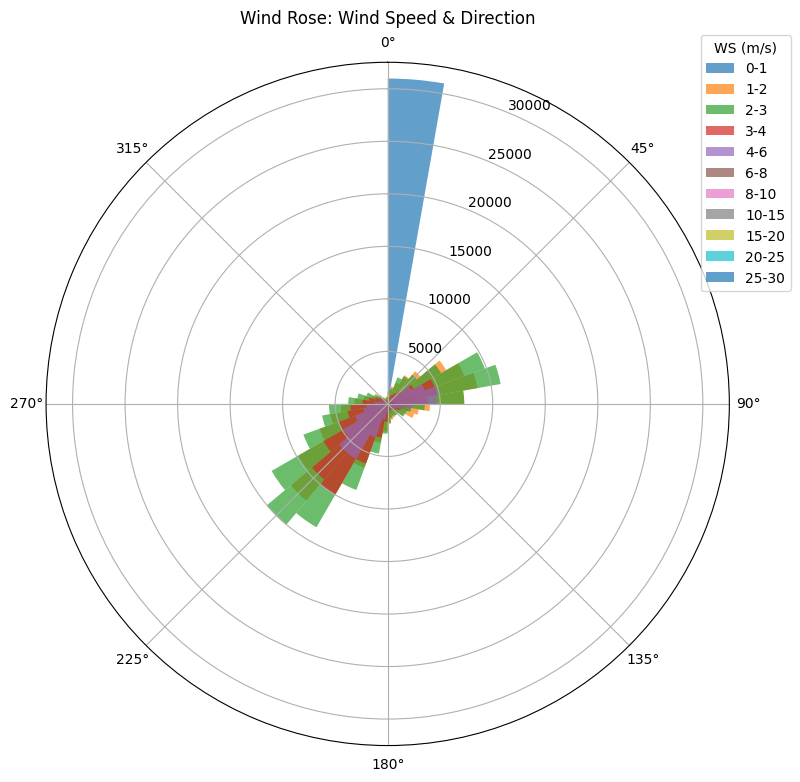

In [14]:
from matplotlib.projections import PolarAxes

# Wind rose plot for WS (Wind Speed) and WD (Wind Direction)

# Prepare wind direction in radians
wd_rad = np.deg2rad(df_togo['WD'])

# Define wind speed bins
ws_bins = [0, 1, 2, 3, 4, 6, 8, 10, 15, 20, 25, 30]
ws_labels = [f"{ws_bins[i]}-{ws_bins[i+1]}" for i in range(len(ws_bins)-1)]
df_togo['WS_bin'] = pd.cut(df_togo['WS'], bins=ws_bins, labels=ws_labels, right=False)

# Create wind rose
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
for ws_bin in ws_labels:
    mask = df_togo['WS_bin'] == ws_bin
    ax.hist(wd_rad[mask], bins=36, alpha=0.7, label=ws_bin)

ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_title('Wind Rose: Wind Speed & Direction', va='bottom')
plt.legend(title='WS (m/s)', bbox_to_anchor=(1.1, 1.05))
plt.tight_layout()
plt.show()

### Wind Rose Analysis: Wind Speed & Direction (Togo Dataset)

- **Purpose:**  
    Visualize the distribution of wind speed (WS) and wind direction (WD) throughout the year.

- **Key Observations:**  
    - The wind rose plot displays the frequency of wind speeds coming from different directions.
    - Most wind events are concentrated at lower wind speed bins (0–4 m/s), with higher speeds being rare.
    - Wind directions are distributed across all compass points, but certain directions may show higher frequencies, indicating prevailing wind patterns.

- **Insights:**  
    - The site experiences predominantly low wind speeds, which is typical for the region.
    - Understanding wind patterns is important for site assessment, maintenance planning, and evaluating potential impacts on solar panel performance.

---

## 7. Wind & Distribution Analysis
### Histograms for GHI and one other variable (e.g. WS).

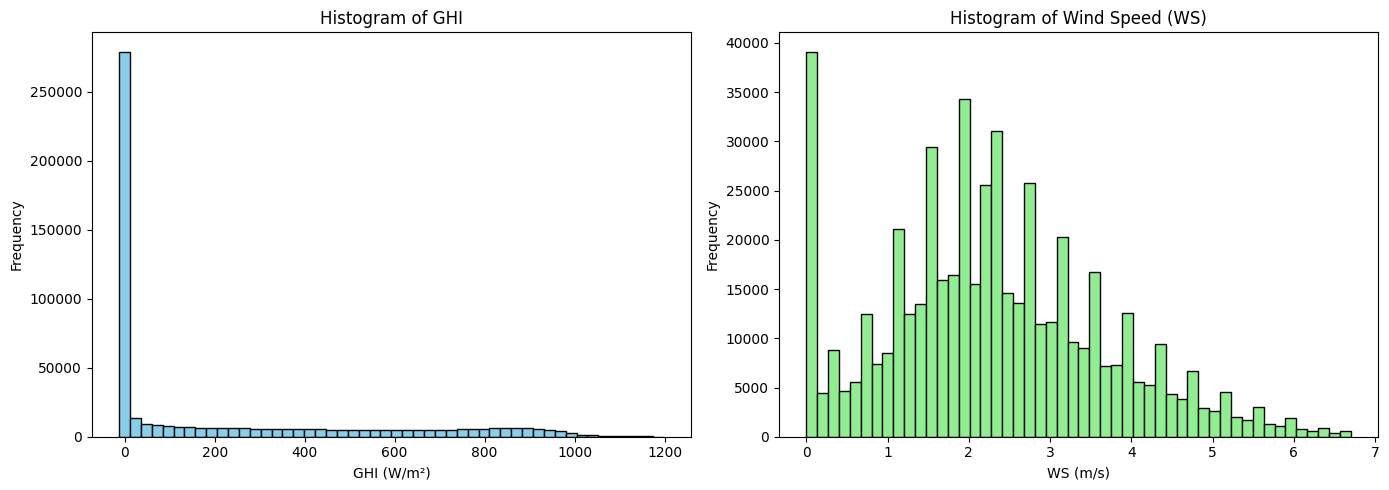

In [15]:
# Histograms for GHI and WS
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(df_togo['GHI'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of GHI')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df_togo['WS'], bins=50, color='lightgreen', edgecolor='black')
plt.title('Histogram of Wind Speed (WS)')
plt.xlabel('WS (m/s)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Histogram Analysis: GHI and Wind Speed (WS) – Togo Dataset

- **GHI (Global Horizontal Irradiance):**
    - The histogram shows a large concentration of values near zero, reflecting nighttime and low-irradiance periods.
    - There is a broad distribution of positive GHI values, with a peak at moderate irradiance and a long tail toward higher values, corresponding to midday sunlight.
    - Negative or near-zero values are likely due to sensor offsets or nighttime readings.

- **WS (Wind Speed):**
    - Wind speed values are heavily skewed toward the lower end, with most observations below 4 m/s.
    - Higher wind speeds are rare, and the frequency drops off quickly as wind speed increases.
    - This distribution is typical for the region, indicating predominantly calm conditions.

**Insights:**  
The histograms confirm that solar irradiance is highly variable throughout the day, while wind speeds remain generally low. These patterns are consistent with the local climate and are important for solar energy system design and performance assessment.

---

## 8. Temperature Analysis
### Examining how relative humidity (RH) might influence temperature readings and solar radiation.

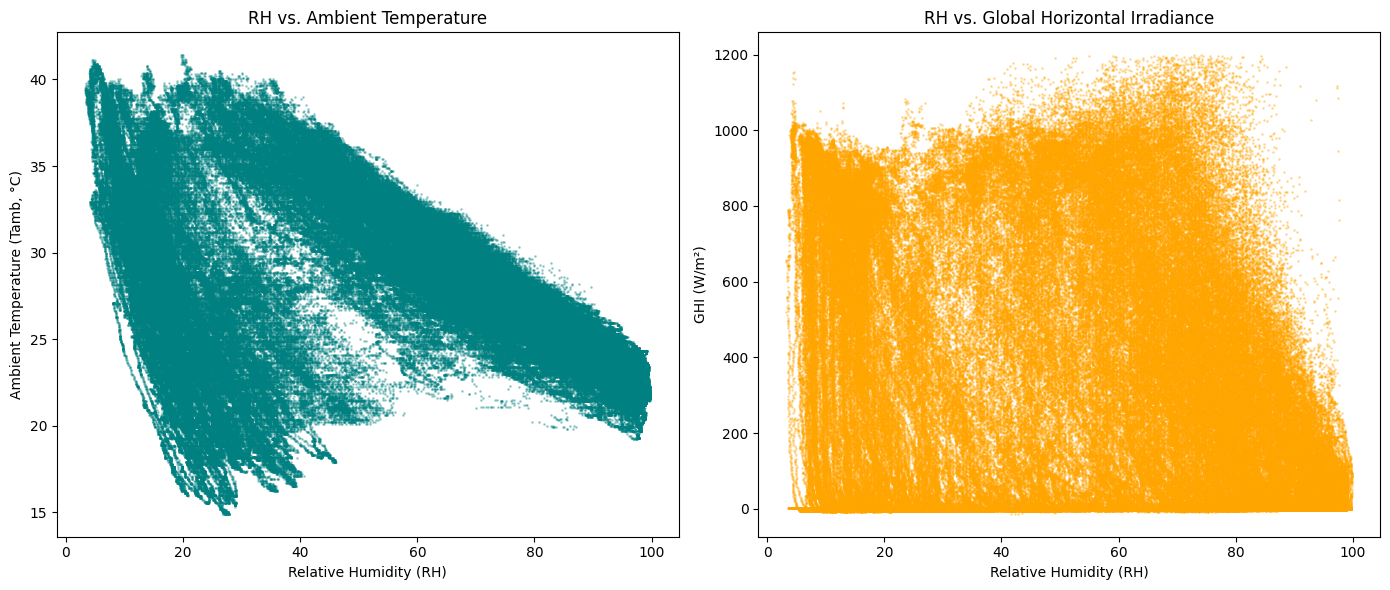

Correlation (RH, Tamb): -0.40
Correlation (RH, GHI): -0.24


In [16]:
# Scatter plots to examine how RH influences temperature and solar radiation

plt.figure(figsize=(14, 6))

# RH vs. Tamb (Ambient Temperature)
plt.subplot(1, 2, 1)
plt.scatter(df_togo['RH'], df_togo['Tamb'], alpha=0.3, s=1, color='teal')
plt.xlabel('Relative Humidity (RH)')
plt.ylabel('Ambient Temperature (Tamb, °C)')
plt.title('RH vs. Ambient Temperature')

# RH vs. GHI (Global Horizontal Irradiance)
plt.subplot(1, 2, 2)
plt.scatter(df_togo['RH'], df_togo['GHI'], alpha=0.3, s=1, color='orange')
plt.xlabel('Relative Humidity (RH)')
plt.ylabel('GHI (W/m²)')
plt.title('RH vs. Global Horizontal Irradiance')

plt.tight_layout()
plt.show()

# Calculate and print correlation coefficients
corr_rh_tamb = df_togo['RH'].corr(df_togo['Tamb'])
corr_rh_ghi = df_togo['RH'].corr(df_togo['GHI'])
print(f"Correlation (RH, Tamb): {corr_rh_tamb:.2f}")
print(f"Correlation (RH, GHI): {corr_rh_ghi:.2f}")

### Summary: Influence of Relative Humidity (RH) on Temperature and Solar Radiation (Togo Dataset)

- **RH vs. Ambient Temperature (Tamb):**
    - There is a moderate negative correlation (r = -0.40) between RH and Tamb.
    - Higher RH values tend to occur at lower ambient temperatures, which is typical in tropical climates where humidity rises during cooler periods (e.g., nighttime or rainy season).

- **RH vs. Global Horizontal Irradiance (GHI):**
    - A weaker negative correlation (r = -0.24) is observed between RH and GHI.
    - Higher RH is generally associated with lower solar irradiance, likely due to increased cloud cover and atmospheric moisture reducing sunlight.

- **Insights:**
    - The negative relationships confirm that humid, cloudy, or rainy conditions in Togo are linked to both cooler temperatures and reduced solar resource availability.
    - These patterns are important for understanding seasonal and daily variability in solar energy production and system performance.

---

## 9. Bubble Chart
### GHI vs. Tamb with bubble size = RH or BP.

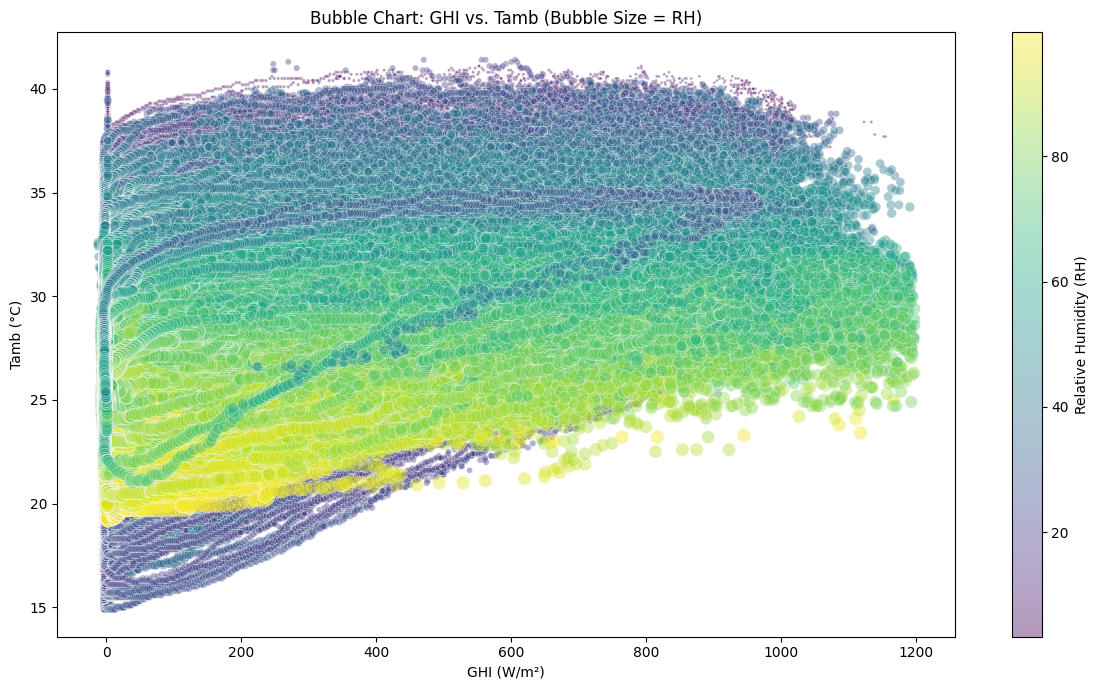

In [17]:
# Bubble chart: GHI vs. Tamb with bubble size = RH

plt.figure(figsize=(12, 7))
plt.scatter(df_togo['GHI'], df_togo['Tamb'], 
            s=df_togo['RH'],  # Bubble size by RH
            c=df_togo['RH'],  # Color by RH for extra info
            cmap='viridis', alpha=0.4, edgecolors='w', linewidth=0.5)
plt.xlabel('GHI (W/m²)')
plt.ylabel('Tamb (°C)')
plt.title('Bubble Chart: GHI vs. Tamb (Bubble Size = RH)')
plt.colorbar(label='Relative Humidity (RH)')
plt.tight_layout()
plt.show()

### Bubble Chart Summary: GHI vs. Tamb with Bubble Size = RH (Togo Dataset)

- **Purpose:**  
    Visualize the relationship between Global Horizontal Irradiance (GHI) and ambient temperature (Tamb), with bubble size and color representing relative humidity (RH).

- **Key Observations:**  
    - **Positive Correlation:** Higher GHI values generally correspond to higher ambient temperatures, reflecting increased solar heating during sunny periods.
    - **Humidity Patterns:** Larger bubbles (higher RH) cluster at lower GHI and Tamb values, indicating that humid conditions are typically cooler and less sunny—consistent with cloudy or rainy weather.
    - **Low RH at High GHI:** Smaller bubbles (lower RH) are found at high GHI and Tamb, showing that the sunniest, hottest periods are also the driest.

- **Insights:**  
    The chart highlights the inverse relationship between humidity and both solar irradiance and temperature in Togo. This is important for understanding how weather conditions impact solar energy production and system performance.